In [67]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt 
import seaborn as sns     # MATLAB like plotting routines
import random                        # for generating random numbers
#
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
#
import pandas as pd
import tensorflow as tf
#
from tensorflow.keras.models import Model
#
from tensorflow.keras.layers import Dense, Flatten, Input, Activation
#
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
#
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


#
print(tf.__version__)

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used


from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils      

2.10.0


In [68]:
test_size = int(0.3*len(y)) #test/train proportion for supervised learning

In [69]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [70]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)
scaler = StandardScaler()
#X = scaler.fit_transform(X)
X  = NormalizeData(X)

In [71]:
pca = PCA(n_components=2)
#scaler = StandardScaler()

X_pca = pca.fit_transform(X)

#X_train_pca = scaler.fit_transform(X_train_pca)

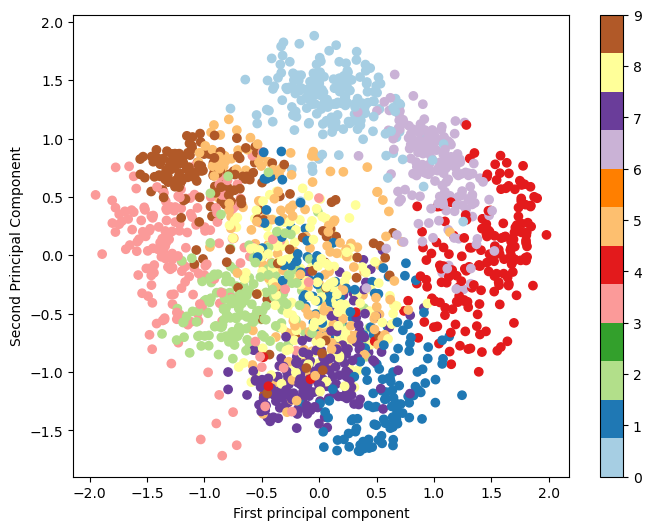

In [72]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
#sample_ind = np.random.choice(np.arange(0,len(X_train_pca)),1000)
#sample = X_train_pca[sample_ind,:]
char=ax.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [73]:
kmeans_pca = KMeans(n_clusters=10, random_state=0)
test_pca = kmeans_pca.fit_predict(X_pca)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


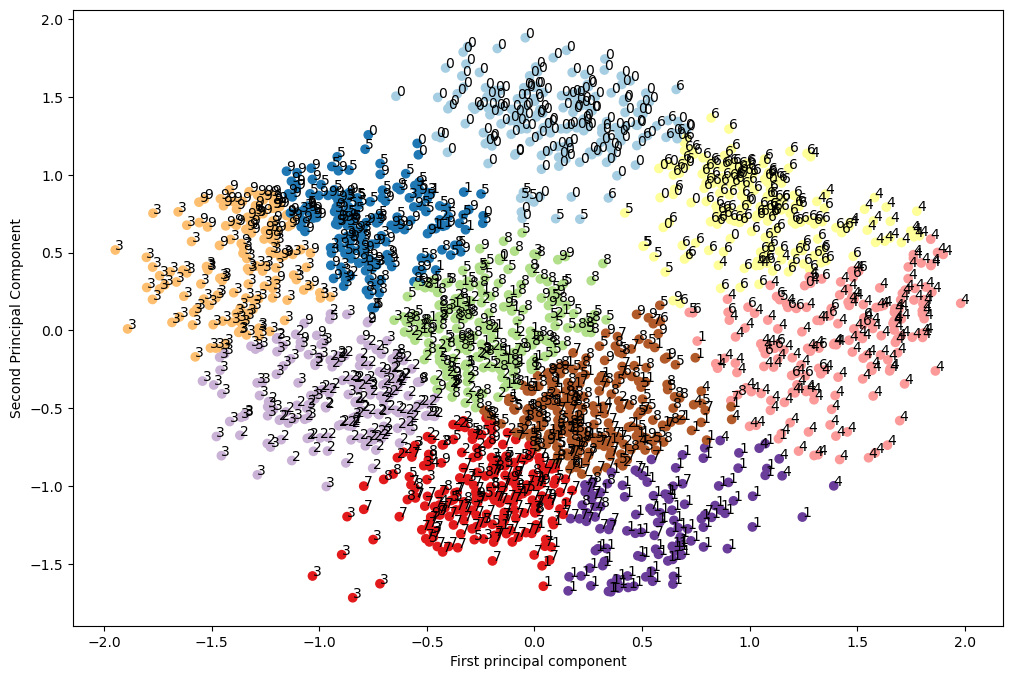

In [74]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_pca[:,0],X_pca[:,1],c=test_pca,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(y):
    ax.annotate(txt, (X_pca[:,0][i], X_pca[:,1][i]))

In [76]:
embedding = MDS(n_components=2)
X_mds = embedding.fit_transform(X)
#X_transformed = scaler.transform(X_transformed)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


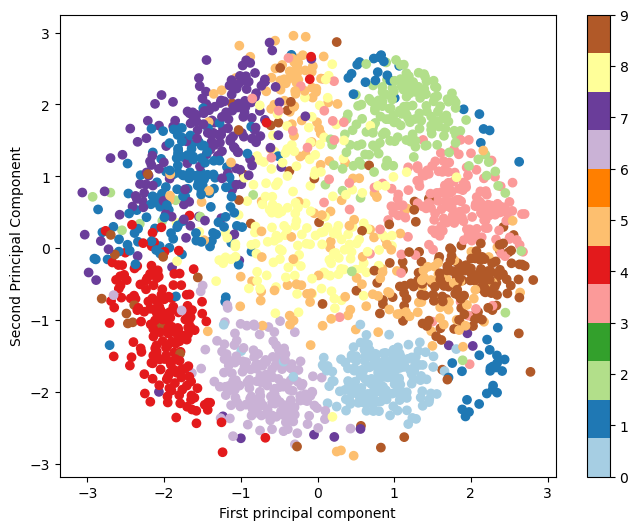

In [77]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
char=ax.scatter(X_mds[:,0],X_mds[:,1],c=y,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [78]:
kmeans_mds = KMeans(n_clusters=10, random_state=0)
test_mds = kmeans_mds.fit_predict(X_mds)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


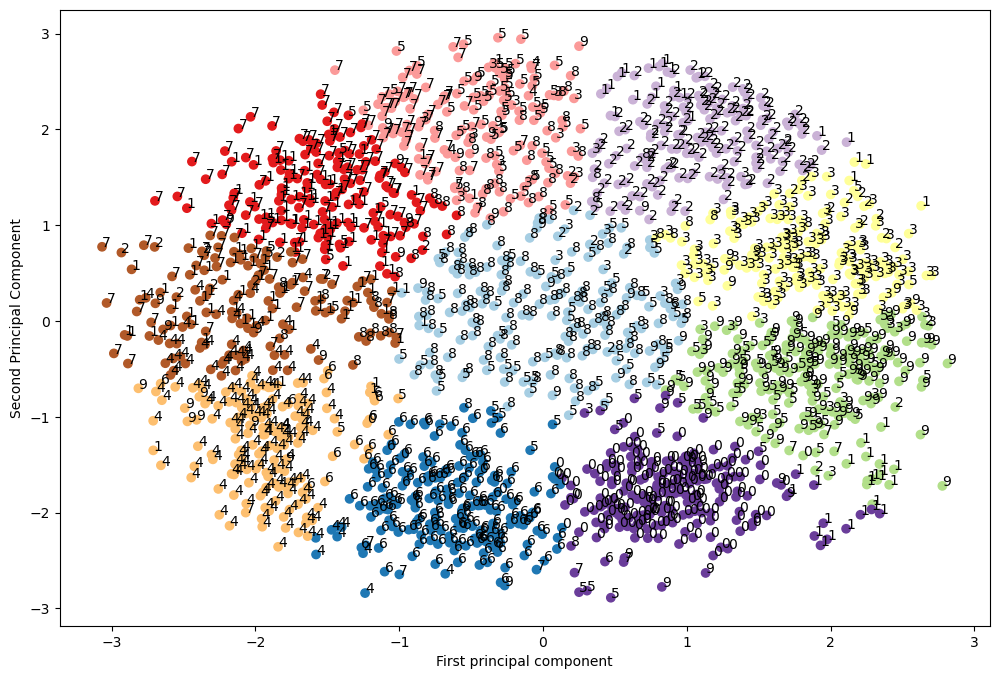

In [79]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_mds[:,0],X_mds[:,1],c=test_mds,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(y):
    ax.annotate(txt, (X_mds[:,0][i], X_mds[:,1][i]))

In [81]:
X_tsne = TSNE(n_components=2, learning_rate='auto',
                  random_state=0,init='pca', perplexity=3).fit_transform(X)

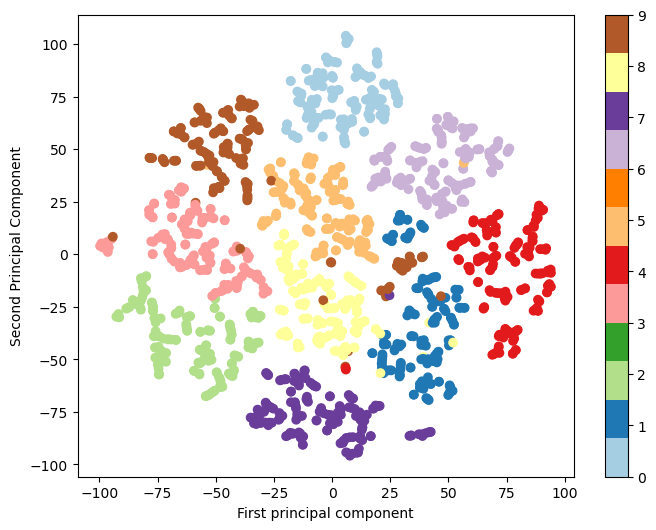

In [82]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()
char=ax.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')
fig.colorbar(char)

In [83]:
kmeans_tsne = KMeans(n_clusters=10, random_state=0)
test_tsne = kmeans_tsne.fit_predict(X_tsne)

C:\Users\jortega\Anaconda3\envs\python310PlanSemilla\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


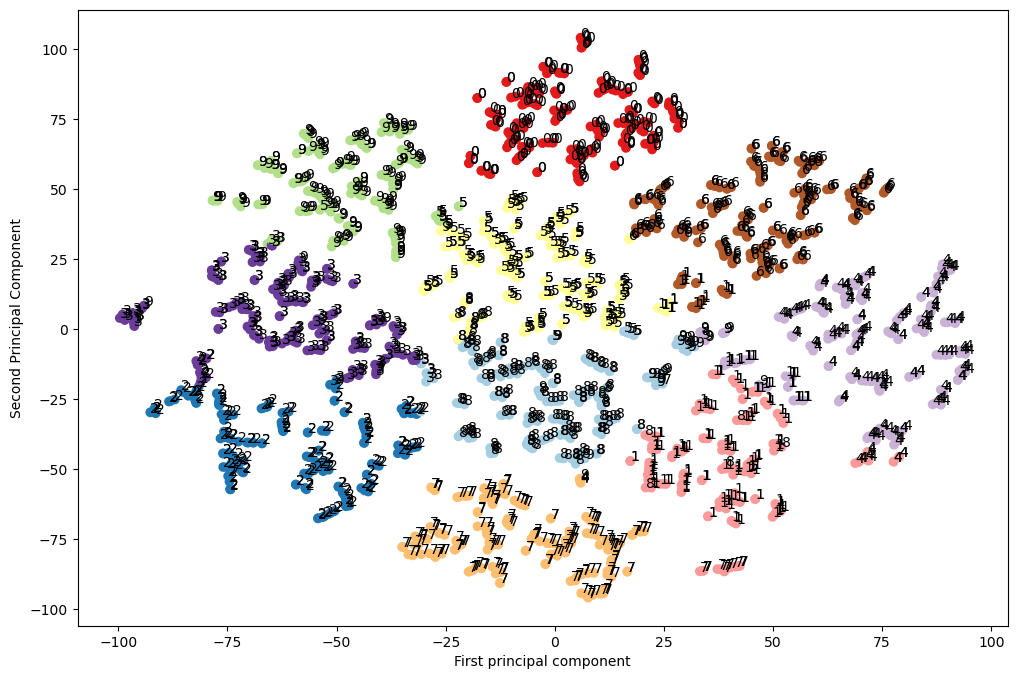

In [84]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()
char=ax.scatter(X_tsne[:,0],X_tsne[:,1],c=test_tsne,cmap='Paired')
ax.set_xlabel('First principal component')
ax.set_ylabel('Second Principal Component')

for i, txt in enumerate(y):
    ax.annotate(txt, (X_tsne[:,0][i], X_tsne[:,1][i]))